<a href="https://colab.research.google.com/github/MichaelVL2023/MichaelVL2023/blob/main/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ♥🙂  **Modelo de Machine learning para la prediccion de riesgo de ataque cardiaco** ♥🙂

##**Importamos las librerias** 📊

 Importamos librerías para análisis de datos, cálculos numéricos y gráficos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

#Google Drive
from google.colab import drive
drive.mount('/content/drive')

##**Google Drive** 🖥️

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TF/Grupo_Bussiness/heart_attack_prediction_dataset.csv", encoding='ISO-8859-1', sep=",")

##**Carga de datos** 🔄

In [ ]:
df.head(4)

In [ ]:
df.info()

In [ ]:
print(df.shape)

#**Deteccion de valores nulos** 🤔

## Contamos cuántas filas duplicadas hay en el dataset 🤔

In [ ]:
df.duplicated()

In [ ]:
df[df.duplicated()]

In [ ]:
condicion = df['Patient ID'] == 'BMW7812'
df[condicion]

In [ ]:
df.duplicated().sum()

Eliminacion de filas duplicadas

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

😄✅ *Como resultado se puede evidenciar que no hay duplicados* ✅ 😄

##Mostramos la cantidad de valores únicos por columna, ordenados de menor a mayor🔢

In [ ]:
df.nunique().sort_values(ascending=True)

 ✅ 😄 *Resultado: No hay valores únicos, por lo que todas las columnas aportan valor al análisis* ✅ 😄

##Contamos los valores nulos por fila y los ordena de mayor a menor 🔢

In [ ]:
df.isnull().sum(axis=1).sort_values(ascending=False)

In [ ]:
df.isnull()

##Calculamos el porcentaje de valores nulos por fila ✖

In [ ]:
(df.isnull().sum(axis=1)/df.shape[1]*100).sort_values(ascending=False)

## Eliminamos filas con un 10% o mas (2.7 o mas) de nulos ❌

In [ ]:
df.dropna(thresh=3, inplace=True)
print(df.shape)

*Resultado: Como ninguna fila tiene un 10% de nulos, no se eliminó ninguna* 😁

#**Aplicando mayusculas a los encabezados** 🔠

In [ ]:
columna_renombrar={'age':'Age', ' sex':'Sex','diabates':'Diabetes'}
df.rename(columns=columna_renombrar, inplace=True)
df.head(4)

#**Tratamiento de valores nulos** ⚠️

##Creamos un nuevo dataframe (dt_num) que contiene solo las columnas numéricas. 🔢

In [ ]:
df_num=df.select_dtypes(include='number')
df_num.head(3)

##Creamos una copia del dataframe (dt_cat) con solo las columnas categóricas o no numéricas 🐱

In [ ]:
df_cat=df.select_dtypes(exclude='number').copy()
df_cat.head(3)

Primero trabajamos con df_cat

Vemos cuántos nulos hay en cada columna 🤔

In [ ]:
df_cat.isnull().sum().sort_values(ascending=False)

Vemos que porcentaje de los datos representan los nulos en cada columna 📈

In [ ]:
df_cat.isnull().sum().sort_values(ascending=False) * 100 / len(df_cat)

In [ ]:
print('Variable "District"\n')
print(df_cat['District'].value_counts())
print('\ntotal de nulos: ', df_cat['District'].isnull().sum())
print('total de filas: ', df_cat['District'].count())
print('\nModa: ',df_cat['District'].mode()[0])

Imputamos la moda en los nulos cálculo
📊

In [ ]:
valor_DISTRICT_MODA = df_cat['District'].mode()[0]
df_cat['District'] = df_cat['District'].fillna(valor_DISTRICT_MODA)

In [ ]:
df_cat.isna().sum().sort_values(ascending=False)

In [ ]:
df.isna().sum().sort_values(ascending=False)

**Gráfico de barras que muestra la frecuencia de los diferentes estados civiles en el conjunto de datos categóricos** 🧍👫❓

In [ ]:
ax = df_cat['Marital Status'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Género")

Ahora trabajamos con dt_num 🔢

In [ ]:
print(df_num.shape)
df_num.isna().sum().sort_values(ascending=False)

In [ ]:
df.info()

MODELO REGRESION LOGISTICA HOMBRES

# EDA

#📊 Importamos la librería Seaborn**, que utilizaremos para crear gráficos estadísticos más atractivos y fáciles de interpretar


In [ ]:
import seaborn as sns

## Mostramos un gráfico de barras que representa la cantidad de pacientes con y sin riesgo de infarto. 🩺

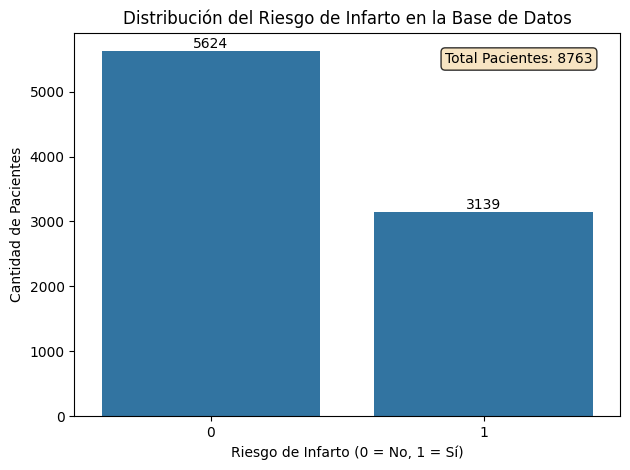

35.82% de los pacientes tienen riesgo de infarto


In [ ]:
sns.countplot(data=df, x='Heart Attack Risk')
plt.title('Distribución del Riesgo de Infarto en la Base de Datos')
plt.xlabel('Riesgo de Infarto (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')

counts = df['Heart Attack Risk'].value_counts()
total_patients = len(df)
risk_patients = counts.get(1, 0)
no_risk_patients = counts.get(0, 0)

plt.text(0, counts.get(0, 0) + 50, str(no_risk_patients), ha='center')
plt.text(1, counts.get(1, 0) + 50, str(risk_patients), ha='center')
plt.text(1.4, plt.ylim()[1] * 0.95, f'Total Pacientes: {total_patients}', ha='right', va='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.8))


plt.tight_layout()
plt.show()

porcentaje_riesgo = df['Heart Attack Risk'].value_counts(normalize=True)[1] * 100
print(f"{porcentaje_riesgo:.2f}% de los pacientes tienen riesgo de infarto")

*Resultado: Vemos que el 35.28% de nuestros pacientes tienen riesgo de infarto* 📈

## Mostramos un gráfico de barras que representa la cantidad de hombres y mujeres dentro del grupo con riesgo de infarto 🚻

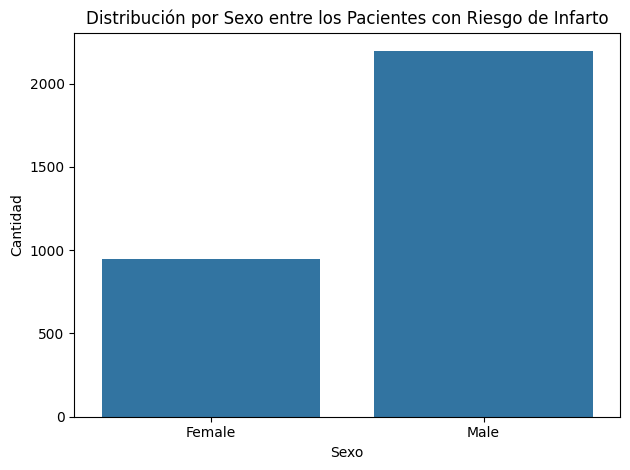

In [ ]:
riesgo = df[df['Heart Attack Risk'] == 1]
sns.countplot(data=riesgo, x='Sex')
plt.title('Distribución por Sexo entre los Pacientes con Riesgo de Infarto')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

*Resultado: De ese 35.28% vemos que una gran mayoría es del sexo masculino, siendo estos más del doble que las mujeres* 👨‍⚕️👩‍⚕️

## Mostramos un gráfico de barras que representa la cantidad de personas con y sin ataque cardíaco por distrito ❤️‍🔥🚨

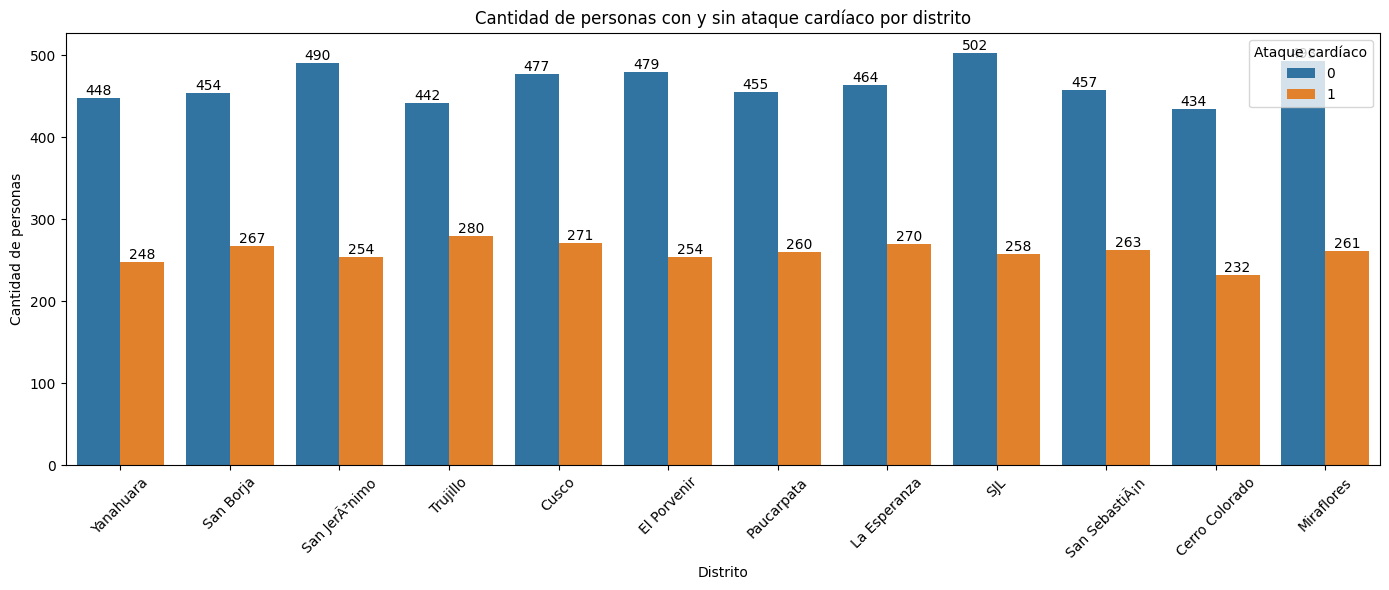

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='District', hue='Heart Attack Risk')
plt.title('Cantidad de personas con y sin ataque cardíaco por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Ataque cardíaco')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Mostramos un gráfico de barras que representa la Distribución de ataques cardíacos por género 🚹🚺🫀

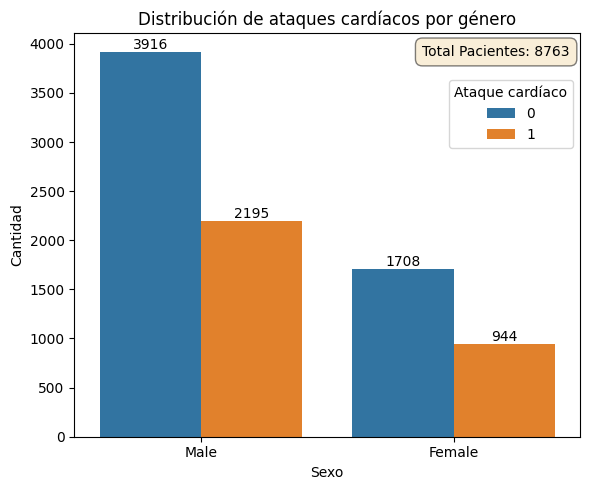

In [ ]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='Sex', hue='Heart Attack Risk')
plt.title('Distribución de ataques cardíacos por género')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Ataque cardíaco', loc='upper right', bbox_to_anchor=(1, 0.9))
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container)

total_patients = df.shape[0]
plt.text(0.98, 0.97, f'Total Pacientes: {total_patients}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()

## Creamos un histograma apilado** para visualizar la distribución de edades entre pacientes con riesgo de infarto, separados por sexo. 📊🧑‍⚕️👩‍⚕️

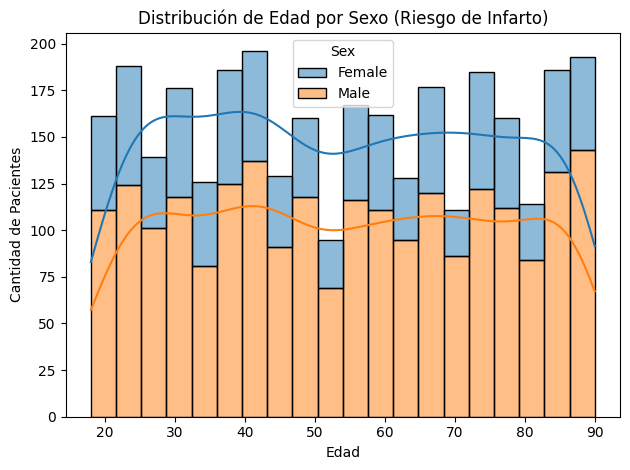

In [ ]:
sns.histplot(data=riesgo, x='Age', hue='Sex', bins=20, kde=True, multiple='stack')
plt.title('Distribución de Edad por Sexo (Riesgo de Infarto)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()

*Resultado: De las mujeres y hombres, vemos que, en nuestro dataset, no hay una edad o rango de edades que sobresalga demasiado. La frecuencia de estas es similar a lo largo de todo el gráfico, sin llegar a ser estadísticamente significativo. 📉👥📊*

##Gráfico de barras que compara la cantidad de fumadores y no fumadores entre pacientes con riesgo de infarto, separados por sexo. 🚬🚭📊

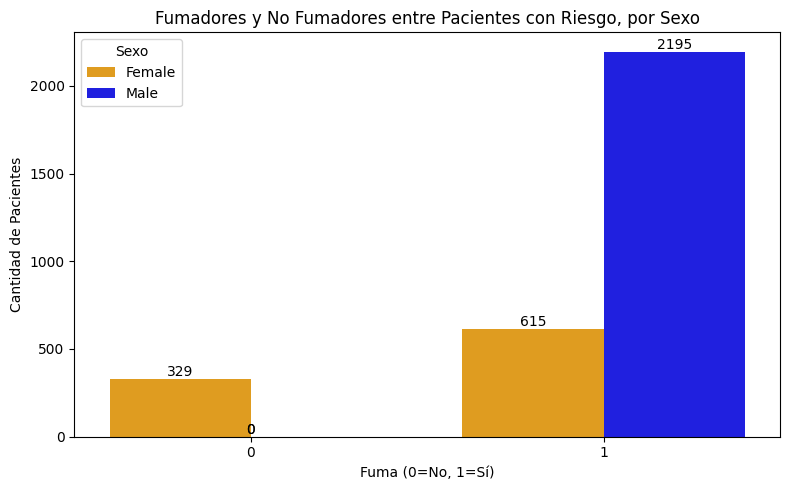

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=riesgo, x='Smoking', hue='Sex', palette=['orange','blue'])
plt.title('Fumadores y No Fumadores entre Pacientes con Riesgo, por Sexo')
plt.xlabel('Fuma (0=No, 1=Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Sexo')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

*Resultado: De las mujeres y hombres, vemos que, en nuestro dataset, no hay una edad o rango de edades que sobresalga demasiado. La frecuencia de estas es similar a lo largo de todo el gráfico, sin llegar a ser estadísticamente significativo. 📊📉👥*

##Creamos dos gráficos de torta (uno para hombres y otro para mujeres) mostrando la proporción de consumo de alcohol 🥧🍷👨👩

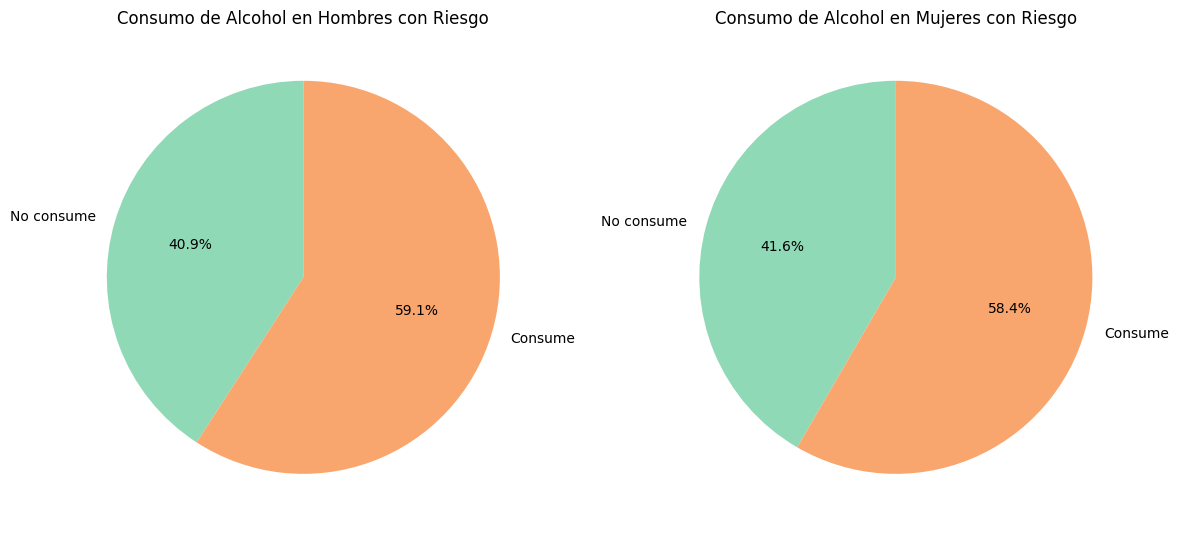

In [ ]:
riesgo_male = riesgo[riesgo['Sex'] == 'Male']
riesgo_female = riesgo[riesgo['Sex'] == 'Female']

counts_male = riesgo_male['Alcohol Consumption'].value_counts().sort_index()
counts_female = riesgo_female['Alcohol Consumption'].value_counts().sort_index()

colors = ['#8fd9b6', '#f9a66e']

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].pie(counts_male, labels=['No consume', 'Consume'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Consumo de Alcohol en Hombres con Riesgo')

axs[1].pie(counts_female, labels=['No consume', 'Consume'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('Consumo de Alcohol en Mujeres con Riesgo')

plt.tight_layout()
plt.show()

*Resultado: Vemos que tanto en hombres como en mujeres con riesgo de ataque al corazón, la mayoría consume alcohol, siendo en hombres ligeramente mayor que en mujeres.* 🍷📊👨👩

##Histograma que muestra la distribución de presión arterial entre pacientes con riesgo de infarto, diferenciando por sexo 🩺📊👨👩

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=riesgo, x='Blood Pressure', hue='Sex', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribución de Presión Arterial en Pacientes con Riesgo, por Sexo')
plt.xlabel('Presión Arterial')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

*Resultado: No se observa una gran diferencia en la distribución de presión arterial entre hombres y mujeres con riesgo de infarto.* 🩺📉👨👩

## Gráfico de barras horizontales apiladas que muestra la distribución de obesidad entre pacientes con riesgo de infarto, diferenciados por sexo. ⚖️📊👨👩

In [ ]:
ct = pd.crosstab(riesgo['Obesity'], riesgo['Sex'])
ct.plot(kind='barh', stacked=True, color=['#1f77b4','#ff7f0e'])
plt.title('Pacientes con Riesgo: Obesidad por Sexo')
plt.xlabel('Cantidad')
plt.ylabel('Obesidad (0=No, 1=Sí)')
plt.legend(['Hombre', 'Mujer'])
plt.tight_layout()
plt.show()

*Resultado: El número total de pacientes obesos es similar al de no obesos, pero en ambos casos las mujeres son mayoría.* ⚖️👩📊

## Boxplot que muestra la distribución del nivel de estrés entre hombres y mujeres con riesgo de infarto. Permite comparar la mediana, dispersión y posibles valores atípicos. 📦📉👨👩

In [ ]:
riesgo_1 = df[(df['Heart Attack Risk'] == 1)]

plt.figure(figsize=(8,6))
sns.boxplot(data=riesgo_1, x='Sex', y='Stress Level')
plt.title('Distribución del Nivel de Estrés por Sexo en Pacientes con Riesgo de Infarto')
plt.xlabel('Sexo')
plt.ylabel('Nivel de Estrés')
plt.tight_layout()
plt.show()

*Resultado: Se aprecia que en promedio las mujeres con riesgo de ataque al corazón presentan mayor nivel de estrés que los hombre* 😟📈👩👨

##Boxplot que compara la cantidad de días de actividad física por semana entre hombres y mujeres con riesgo de infarto. 🏃‍♂️📦👨👩

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=riesgo_1, x='Sex', y='Physical Activity Days Per Week')
plt.title('Días de Actividad Física por Semana según Sexo en Pacientes con Riesgo de Infarto')
plt.xlabel('Sexo')
plt.ylabel('Días de Actividad Física por Semana')
plt.tight_layout()
plt.show()

*Resultado: Vemos que el promedio de días que se ejercitan hombres y mujeres es muy similar, pero las mujeres tienen una variabilidad más alta, unas se ejercitan muy poco y otras mucho, mientras que los hombres tienen una actividad física más consistente, sin tantos casos extremos.* 🏃‍♀️📊👨👩

## Creamos una matriz de correlación entre las variables numéricas del dataset médico para identificar posibles relaciones lineales entre ellas. 📊🧠📈

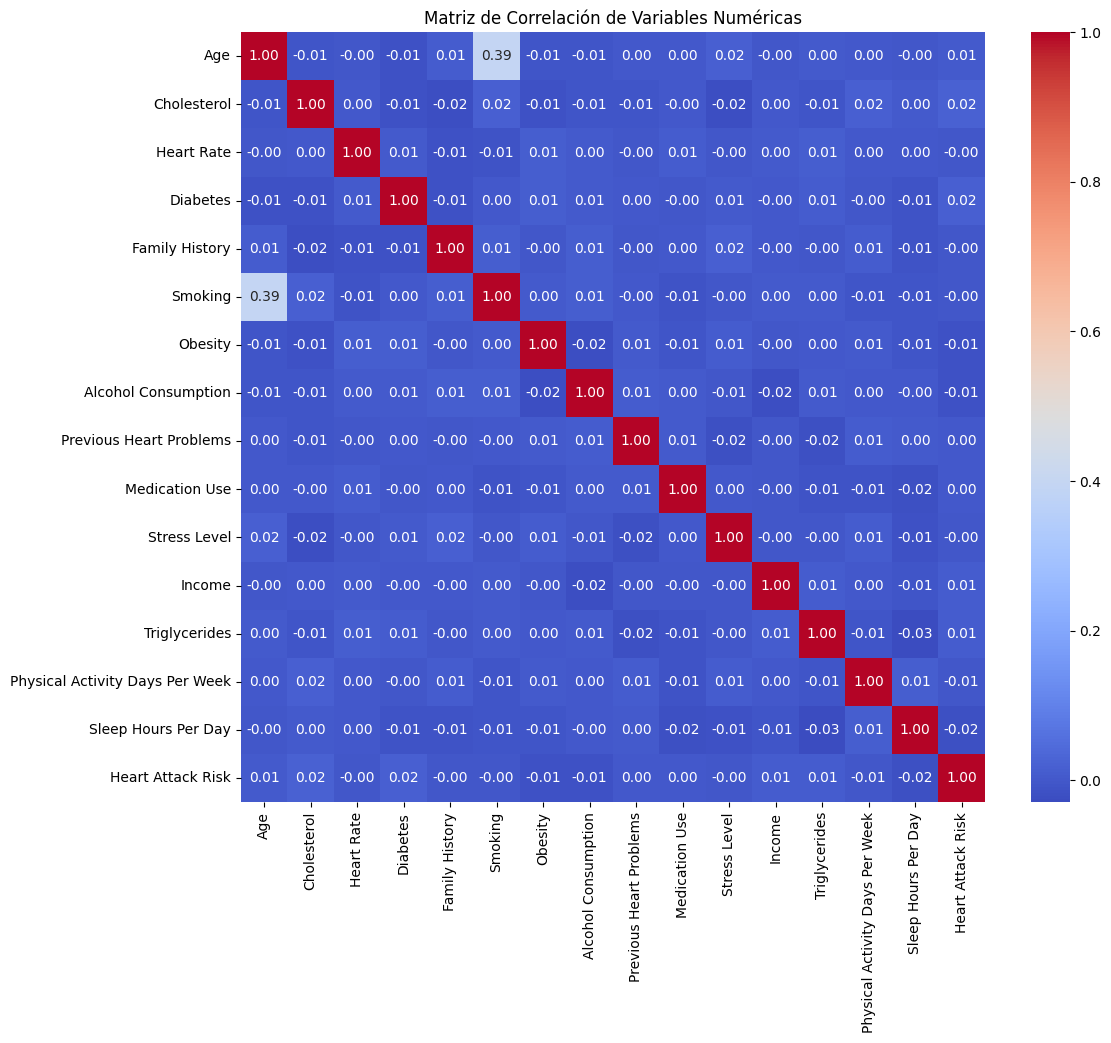

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
df_corr = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Transformación de datos 📊

## Codificación de Variables Categóricas

### a) Label Encoding para Variables Binarias

In [ ]:
# Variables binarias (con 2 categorías) que están en texto y deben convertirse a 0/1
binarias = ['Smoking', 'Alcohol Consumption', 'Family History']

for col in binarias:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en Smoking: [1 0]
Valores únicos en Alcohol Consumption: [0 1]
Valores únicos en Family History: [0 1]


### b) One-Hot Encoding para Variables con Múltiples Categorías

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Columnas categóricas con más de 2 categorías para One-Hot Encoding
columnas_onehot = ['Sex', 'Marital Status', 'Diet', 'Province', 'Hemisphere']

oneHE = OneHotEncoder(sparse_output=False, drop='first', dtype='int64')  # drop_first para evitar multicolinealidad
df_oneHE_array = oneHE.fit_transform(df[columnas_onehot])
df_oneHE = pd.DataFrame(df_oneHE_array, columns=oneHE.get_feature_names_out())

print("Variables categóricas convertidas con One-Hot Encoding:")
print(df_oneHE.head())

Variables categóricas convertidas con One-Hot Encoding:
   Sex_Male  Marital Status_S  Marital Status_V  Diet_Healthy  Diet_Unhealthy  \
0         1                 1                 0             0               0   
1         1                 1                 0             0               1   
2         0                 1                 0             1               0   
3         1                 1                 0             0               0   
4         1                 0                 1             0               1   

   Province_Cusco  Province_Lima  Province_Trujillo  \
0               0              0                  0   
1               0              1                  0   
2               1              0                  0   
3               0              0                  1   
4               1              0                  0   

   Hemisphere_Southern Hemisphere  
0                               1  
1                               0  
2                 

## Escalado de Variables Numéricas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columnas numéricas a escalar
columnas_num = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking',
                'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use',
                'Stress Level', 'Income', 'Triglycerides', 'Physical Activity Days Per Week',
                'Sleep Hours Per Day', 'Heart Attack Risk']

mms = MinMaxScaler()
mms.fit(df[columnas_num])
df_mms_array = mms.transform(df[columnas_num])
df_mms = pd.DataFrame(df_mms_array, columns=columnas_num)

print("Variables numéricas escaladas:")
print(df_mms.head())

Variables numéricas escaladas:
    Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0 0.681        0.314       0.457     0.000           0.000    1.000    0.000   
1 0.042        0.961       0.829     1.000           1.000    1.000    1.000   
2 0.042        0.729       0.457     1.000           0.000    0.000    0.000   
3 0.917        0.939       0.471     1.000           1.000    1.000    0.000   
4 0.667        0.707       0.757     1.000           1.000    1.000    1.000   

   Alcohol Consumption  Previous Heart Problems  Medication Use  Stress Level  \
0                0.000                    0.000           0.000         0.889   
1                1.000                    1.000           0.000         0.000   
2                0.000                    1.000           1.000         0.889   
3                1.000                    1.000           0.000         0.889   
4                0.000                    1.000           0.000         0.556   

 

## Separación de Variables Predictoras y Variable Objetivo

In [ ]:
# Variable objetivo
df_target = df['Heart Attack Risk']

# Variables predictoras
df_predictoras = pd.concat([df_oneHE, df_mms.drop(columns=['Heart Attack Risk'])], axis=1)

print("Variables predictoras:")
print(df_predictoras.head())

print("Variable objetivo:")
print(df_target.head())

Variables predictoras:
   Sex_Male  Marital Status_S  Marital Status_V  Diet_Healthy  Diet_Unhealthy  \
0         1                 1                 0             0               0   
1         1                 1                 0             0               1   
2         0                 1                 0             1               0   
3         1                 1                 0             0               0   
4         1                 0                 1             0               1   

   Province_Cusco  Province_Lima  Province_Trujillo  \
0               0              0                  0   
1               0              1                  0   
2               1              0                  0   
3               0              0                  1   
4               1              0                  0   

   Hemisphere_Southern Hemisphere   Age  ...  Smoking  Obesity  \
0                               1 0.681  ...    1.000    0.000   
1                          

In [ ]:
df_final = pd.concat([df_oneHE, df_mms, df_target], axis=1)
df_final.head()

,Sex_Male,Marital Status_S,Marital Status_V,Diet_Healthy,Diet_Unhealthy,Province_Cusco,Province_Lima,Province_Trujillo,Hemisphere_Southern Hemisphere,Age,...,Alcohol Consumption,Previous Heart Problems,Medication Use,Stress Level,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Heart Attack Risk
0,1,1,0,0,0,0,0,0,1,0.681,...,0.000,0.000,0.000,0.889,0.862,0.332,0.000,0.333,0.000,0
1,1,1,0,0,1,0,1,0,0,0.042,...,1.000,1.000,0.000,0.000,0.949,0.266,0.143,0.500,0.000,0
2,0,1,0,1,0,1,0,0,0,0.042,...,0.000,1.000,1.000,0.889,0.769,0.723,0.571,0.000,0.000,0
3,1,1,0,0,0,0,0,1,0,0.917,...,1.000,1.000,0.000,0.889,0.377,0.452,0.429,0.000,0.000,0
4,1,0,1,0,1,1,0,0,0,0.667,...,0.000,1.000,0.000,0.556,0.502,0.261,0.143,0.167,0.000,0


#Regresion Logistica 📊🤖

##Paso 1: Importar librerías necesarias 📦

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve,
    precision_score, recall_score, f1_score
)
from sklearn.impute import SimpleImputer

##Paso 2: Filtrar el dataset a hombres 👨‍💼🧪

In [ ]:

print("Valores en columna 'Sex':", df['Sex'].unique())
df_male = df[df['Sex'] == 'Male'].copy()

Valores en columna 'Sex': ['Male' 'Female']


##Paso 3: Corregir nombres de columnas y convertir variables a numérico 🛠️🔢

In [ ]:

df_male.rename(columns={"diabates":"Diabetes"}, inplace=True)
cols_to_numeric = ['BMI', 'Sedentary Hours Per Day', 'Exercise Hours Per Week']
for col in cols_to_numeric:
    df_male[col] = pd.to_numeric(df_male[col], errors="coerce")

##Paso 4: Seleccionar variables relevantes 🎯📌

In [ ]:
# Lista de columnas que queremos conservar
features = [
    'Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
    'Smoking', 'Alcohol Consumption', 'Exercise Hours Per Week',
    'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
    'BMI', 'Sedentary Hours Per Day', 'Income', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day',
    'Hemisphere', 'Heart Attack Risk'
]

# Asegurarse de que existan en el DataFrame
features = [col for col in features if col in df_male.columns]

# Crear nuevo DataFrame con las columnas seleccionadas
df_male_model = df_male[features].copy()

##Paso 5: Convertir variables categóricas a dummies 🧩➡️🔢

In [ ]:
df_male_model = pd.get_dummies(df_male_model, columns=['Diet', 'Hemisphere'], drop_first=True)

##Paso 6: Separar X e Y (variables predictoras y variable objetivo) ✂️📈🎯

In [ ]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_male_model.drop('Heart Attack Risk', axis=1)
y = df_male_model['Heart Attack Risk']

##Paso 7: Preprocesamiento robusto (imputación y limpieza) 🧼🛠️📊

In [ ]:
# Eliminar columnas completamente vacías
X = X.dropna(axis=1, how="all")

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

##Paso 8: Separar conjunto de entrenamiento y prueba 🧪🧠📉

In [ ]:
# Separar datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Escalar solo para regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Paso 9: Entrenar y evaluar modelo de Regresión Logística 🤖📊✅

In [ ]:
# Entrenar modelo con peso balanceado
log_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

# Predicciones
log_pred = log_model.predict(X_test_scaled)
log_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
log_acc = accuracy_score(y_test, log_pred)
log_auc = roc_auc_score(y_test, log_proba)
precision = precision_score(y_test, log_pred)
recall = recall_score(y_test, log_pred)
f1 = f1_score(y_test, log_pred)

# Mostrar resultados
print("\n===== REGRESIÓN LOGÍSTICA =====")
print(f"{'Accuracy:':<12} {log_acc:.3f}")
print(f"{'AUC:':<12} {log_auc:.3f}")
print(f"{'Precision:':<12} {precision:.3f}")
print(f"{'Recall:':<12} {recall:.3f}")
print(f"{'F1-score:':<12} {f1:.3f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, log_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, log_pred))


===== REGRESIÓN LOGÍSTICA =====
Accuracy:    0.508
AUC:         0.499
Precision:   0.367
Recall:      0.510
F1-score:    0.427

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       979
           1       0.37      0.51      0.43       549

    accuracy                           0.51      1528
   macro avg       0.51      0.51      0.50      1528
weighted avg       0.55      0.51      0.52      1528

Matriz de Confusión:
[[496 483]
 [269 280]]


# RANDOM FOREST 🌲🧠✨

##Paso 1: Importar librerías necesarias 📦🧪

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

##Paso 2: Filtrar solo hombres y corregir columna 👨‍💼🧼

In [ ]:
# Filtrar solo registros con sexo masculino
df_male = df[df['Sex'] == 'Male'].copy()

# Corregir el nombre mal escrito de la columna 'diabates'
df_male.rename(columns={"diabates":"Diabetes"}, inplace=True)

## Paso 3: Seleccionar variables relevantes y codificar 🎯🔡➡️🔢

In [ ]:
# Selección de columnas a usar
features = [
    'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
    'Smoking', 'Alcohol Consumption', 'Previous Heart Problems',
    'Medication Use', 'Stress Level', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere',
    'Heart Attack Risk'
]

# Subset del DataFrame
df_model = df_male[features].copy()

# Codificar variable 'Sex': Female=0, Male=1
df_model['Sex'] = df_model['Sex'].map({'Female': 0, 'Male': 1})

# Codificar variable 'Hemisphere' usando one-hot encoding
df_model = pd.get_dummies(df_model, columns=['Hemisphere'], drop_first=True)

## Paso 4: Preparar variables X (predictoras) e Y (objetivo) 🧩🎯📊

In [ ]:
# Separar variables predictoras y objetivo
X = df_model.drop('Heart Attack Risk', axis=1)
y = df_model['Heart Attack Risk']

# Imputar valores nulos con la media
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


## Paso 5: Entrenar y evaluar modelo Random Forest 🌲🤖📈✅

In [ ]:
# Entrenamiento del modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== RANDOM FOREST SOLO HOMBRES =====")
print(f"Accuracy:  {acc:.3f}")
print(f"AUC:       {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


===== RANDOM FOREST SOLO HOMBRES =====
Accuracy:  0.639
AUC:       0.506
Precision: 0.459
Recall:    0.031
F1-score:  0.058
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       979
           1       0.46      0.03      0.06       549

    accuracy                           0.64      1528
   macro avg       0.55      0.51      0.42      1528
weighted avg       0.58      0.64      0.52      1528

Matriz de Confusión:
[[959  20]
 [532  17]]


# Modelo KNN (K-Nearest Neighbors) 📍👥🔍

##Paso 1: Importar librerías necesarias 📚

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import pandas as pd

##Paso 2: Filtrar solo hombres 👨

In [ ]:
# Filtrar registros masculinos
df_male = df[df['Sex'] == 'Male'].copy()

# Renombrar columna mal escrita
df_male.rename(columns={"diabates":"Diabetes"}, inplace=True)

##Paso 3: Seleccionar variables relevantes 🎯

In [ ]:
# Lista de columnas seleccionadas
features = [
    'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
    'Smoking', 'Alcohol Consumption', 'Previous Heart Problems',
    'Medication Use', 'Stress Level', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Hemisphere',
    'Heart Attack Risk'
]

# Subset del DataFrame
df_model = df_male[features].copy()

# Codificación de sexo
df_model['Sex'] = df_model['Sex'].map({'Female': 0, 'Male': 1})

# Codificación de Hemisferio
df_model = pd.get_dummies(df_model, columns=['Hemisphere'], drop_first=True)

## Paso 4: Preparar X e y 🧪

In [ ]:
# Separar variables predictoras y variable objetivo
X = df_model.drop('Heart Attack Risk', axis=1)
y = df_model['Heart Attack Risk']

# Imputar valores faltantes con media
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

## Paso 5: Modelo KNN 🧠

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicciones
y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]

# Métricas individuales
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar resultados
print("\n===== KNN SOLO HOMBRES =====")
print(f"Accuracy:  {acc:.3f}")
print(f"AUC:       {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


===== KNN SOLO HOMBRES =====
Accuracy:  0.580
AUC:       0.530
Precision: 0.379
Recall:    0.262
F1-score:  0.310

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       979
           1       0.38      0.26      0.31       549

    accuracy                           0.58      1528
   macro avg       0.51      0.51      0.50      1528
weighted avg       0.55      0.58      0.56      1528

Matriz de Confusión:
[[743 236]
 [405 144]]


# Optimizacion

##Feature Selection

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
X = df.drop(['Heart Attack Risk'], axis = 1)
y = df['Heart Attack Risk']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Columnas con valores no numéricos:", non_numeric_columns.tolist())

Columnas con valores no numéricos: ['Patient ID', 'Sex', 'Blood Pressure', 'Exercise Hours Per Week', 'Diet', 'Sedentary Hours Per Day', 'BMI', 'Province', 'District', 'Hemisphere', 'Marital Status']


In [ ]:
print(X_train[non_numeric_columns].head())

     Patient ID     Sex Blood Pressure Exercise Hours Per Week       Diet  \
5286    YBS0194    Male         167/62  13.695.966.114.950.000  Unhealthy   
1119    KLH2737  Female         143/65  48.077.817.173.686.300    Average   
5315    FEC2399    Male         158/84  13.043.859.299.224.700  Unhealthy   
3160    TDZ5821    Male        115/103   7.765.711.521.366.260    Average   
6791    MTT6753    Male          90/70  18.694.085.526.099.100  Unhealthy   

     Sedentary Hours Per Day                     BMI Province        District  \
5286     106.131.133.329.986   2.937.750.490.895.620     Lima             SJL   
1119   4.437.020.125.726.400  23.915.853.844.364.300    Cusco           Cusco   
5315  11.625.866.772.695.100     287.682.802.176.176     Lima             SJL   
3160   7.719.682.318.740.700   1.964.781.692.227.390    Cusco  San SebastiÃ¡n   
6791  11.566.199.871.610.800  27.082.342.568.738.200    Cusco   San JerÃ³nimo   

               Hemisphere Marital Status  
5286  N

In [ ]:
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)

In [ ]:
#se utiliza para realizar la selección de características (feature selection) en conjuntos de datos. SelectFromModel se utiliza como un clasificador de bosque aleatorio
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000)) #, threshold=0.03)
sel.fit(X_train, y_train)

In [ ]:
sel.get_support()

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
selected_feat

In [ ]:
print(len(selected_feat))

In [ ]:
sel.estimator_.feature_importances_

In [ ]:
sel.estimator_.feature_importances_.mean()

In [ ]:
fselection = pd.DataFrame({
    'feature': X_train.columns,
    'importance': sel.estimator_.feature_importances_
})

# Ordenamos por importancia
fselection.sort_values(by='importance', ascending=False, inplace=True)
fselection

# Hiperparametrizacion

In [ ]:
X = df.drop(['Heart Attack Risk'], axis = 1)
y = df['Heart Attack Risk']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
algoritmo_rf = RandomForestClassifier()

In [ ]:
grid_parameters =   { 'criterion'        : ['giny','entropy'], # Gini y entropy sirven medir la impureza de un nodo aleatoriamente
                      'max_depth'        : [10, 14, 20], #profundidad del arbol
                      'max_features'     : [10,20], #cantidad máxima de características que se consideran para dividir un nodo en un árbol de decisión
                      'min_samples_leaf' : [2, 4],  #número mínimo de muestras requeridas  para formar una hoja
                      'min_samples_split': [5, 10], #número mínimo de muestras requeridas para realizar una división en un nodo interno
                      'n_estimators'     : [100, 500], #Crear un clasificador de bosque aleatorio con N# estimadores
                      'n_jobs'           : [-1]} #(n_jobs) -1 para usar todos los núcleos disponibles

In [ ]:
random_parameters = { 'criterion'        : ['giny','entropy'], # Gini y entropy sirven medir la impureza de un nodo aleatoriamente
                      'max_depth'        : [5, 10, 14, 20, 30],  #profundidad del arbol
                      'max_features'     : [10,2],  #cantidad máxima de características que se consideran para dividir un nodo en un árbol de decisión
                      'min_samples_leaf' : [2, 4],  #número mínimo de muestras requeridas  para formar una hoja
                      'min_samples_split': [5, 10],  #número mínimo de muestras requeridas para realizar una división en un nodo interno
                      'n_estimators'     : [100, 500, 1000]} #Crear un clasificador de bosque aleatorio con N# estimadores

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid_search_rf = GridSearchCV(
                                      estimator           = algoritmo_rf, #objeto con el algoritmo que se va a entrenar nuestro modelo
                                      param_grid          = grid_parameters,
                                      scoring             = 'roc_auc',#métrica que será evaluado para tener una mejor precisión
                                      n_jobs              = -1,
                                      cv                  = 3,
                                      verbose             = 0
                                     )

In [ ]:
random_search_rf = RandomizedSearchCV(
                                      estimator           = algoritmo_rf,
                                      param_distributions = random_parameters,
                                      n_iter              = 10,
                                      scoring             = 'roc_auc', #métrica que será evaluado para tener una mejor precisión
                                      n_jobs              = -1,
                                      cv                  = 3,
                                      verbose             = 0
                                     )

#GridSearch

In [ ]:
non_numeric = X_train.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric.tolist())


In [ ]:
X_train = X_train.drop(columns=non_numeric)
X_test = X_test.drop(columns=non_numeric)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar columnas iguales en train/test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],  # corregido
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenamiento con datos corregidos
mejor_modelo_rf = grid_search_rf.fit(X_train, y_train)

In [ ]:
print('Configuración de los mejores parámetros:')
mejor_modelo_rf.best_params_

In [ ]:
print(f'Resultado de la métrica {mejor_modelo_rf.scoring} de la mejor configuración de parámetros:')

mejor_modelo_rf.best_score_

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Predicciones del mejor modelo
y_pred_rf = mejor_modelo_rf.predict(X_test)
y_proba_rf = mejor_modelo_rf.predict_proba(X_test)[:, 1]

# Cálculo de métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Guardamos en DataFrame
results_rf_grid = pd.DataFrame(
    [['Random Forest GridSearch', acc_rf, f1_rf, prec_rf, rec_rf, auc_rf]],
    columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'AUC']
)

# Mostramos resultados
print(results_rf_grid)

# RandomSearch

In [ ]:
#Exploración Aleatoria: RandomizedSearchCV realiza una búsqueda aleatoria en el espacio de hiperparámetros. Se seleccionan un número fijo de combinaciones de hiperparámetros al azar y se evalúan mediante validación cruzada.
#Espacio Continuo o Discreto: Es más flexible y puede manejar tanto espacios continuos como discretos de hiperparámetros.
#Eficiente para Espacios Amplios: Puede ser más eficiente que GridSearchCV cuando el espacio de búsqueda es grande, ya que no evalúa todas las combinaciones posibles.

mejor_modelo_rf = random_search_rf.fit(X_train,y_train)

#print('\nConfiguración de todos los valores del grid:')
#mejor_modelo_rf

In [ ]:
print('Configuración de los mejores parámetros:')
mejor_modelo_rf.best_params_

In [ ]:
print(f'Resultado de la métrica {mejor_modelo_rf.scoring} de la mejor configuración de parámetros:')

mejor_modelo_rf.best_score_

In [ ]:
#Modelo Final: Entrenar con los mejores parámetros a todo TRAIN
algoritmo_rf = RandomForestClassifier(criterion='entropy', max_depth=14, max_features=2,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=100, n_jobs=-1)
algoritmo_rf.fit(X_train, y_train)

In [ ]:
y_pred_rf_hy       = algoritmo_rf.predict(X_test)
y_pred_rf_proba_hy = algoritmo_rf.predict_proba(X_test)
y_pred_rf_proba_hy[:,1][:10]

In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
acc_rf_hy  = accuracy_score(y_test,y_pred_rf_hy)
f1_rf_hy   = f1_score(y_test,y_pred_rf_hy)
prec_rf_hy = precision_score(y_test, y_pred_rf_hy)
rec_rf_hy  = recall_score(y_test, y_pred_rf_hy)
auc_rf_hy  = roc_auc_score(y_test,y_pred_rf_proba_hy[:,1])

In [ ]:
resultsrf_hy = pd.DataFrame([['Random Forest Hyperparameters', acc_rf_hy,f1_rf_hy,prec_rf_hy,rec_rf_hy,auc_rf_hy]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])
resultsrf_hy

In [ ]:
cm_rf_hy = confusion_matrix(y_test,y_pred_rf_hy)
print(cm_rf_hy)